# 1. Principal Component Analysis and Eigenfaces
## 1.1 Principal Component Analysis (PCA) <cite id="6tesg"><a href="#zotero%7C14215332%2FQAQDTFI8">(Jaadi, n.d.)</a></cite>
Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. 
Reducing the number of variables has an impact on the accuracy of the data description, however, this technique is quite useful as it allows us to work with smaller sets of variables which enables us to better analyze the data and decrease the computational time in the creation of machine learning models.
Main idea of PCA: Reduce the number of variables of a data set, while preserving as much information as possible.

**Steps to perform PCA**
1. Data Standardization.
2. Covariance Matrix computation for the data set variables.
3. Compute the eigenvalues and eigenvectors for the covariance matrix (the eigenvectors are our Principal Components).
4. Sort the eigenvalues in descending order (and their corresponding eigenvectors) so the Principal Components are sorted by their level of variance.
5. Feature Vector: Calculate how many eigenvectors carry the most variance of the data.
6. Recast the Data Along the Principal Components Axes.

## 1.2 Eigenfaces <cite id="xhkvi"><a href="#zotero%7C14215332%2FWCBFAHE4">(Zhang &#38; Turk, n.d.)</a></cite>
Eigenfaces refers to an appearance-based approach to face recognition that seeks to capture the variation in a collection of face images and use this information to encode and compare images of individual faces in a holistic (as opposed to a parts-based or feature-based) manner. Specifically, the eigenfaces are the principal components of a distribution of faces, or equivalently, the eigenvectors of the covariance matrix of the set of face images, where an image with $N$ pixels is considered a point (or vector) in $N$-dimensional space.
The eigenfaces may be considered as a set of features which characterize the global variation among face images. Then each face image is approximated using a subset of the eigenfaces, those associated with the largest eigenvalues. These features account for the most variance in the training set. 

# 2. Create Eigenfaces
## 2.1 Load data
For this task, we will be using the Olivetti faces data set of Scikit-learn which can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html). The data set contains 400 photos of 64x64 pixels each taken to 40 subjects in 10 different poses. All photos are in grayscale.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

In [2]:
# Load faces from Olivetti data set
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=0)

# Get # of samples and # of features
n_samples, n_features = faces.shape  

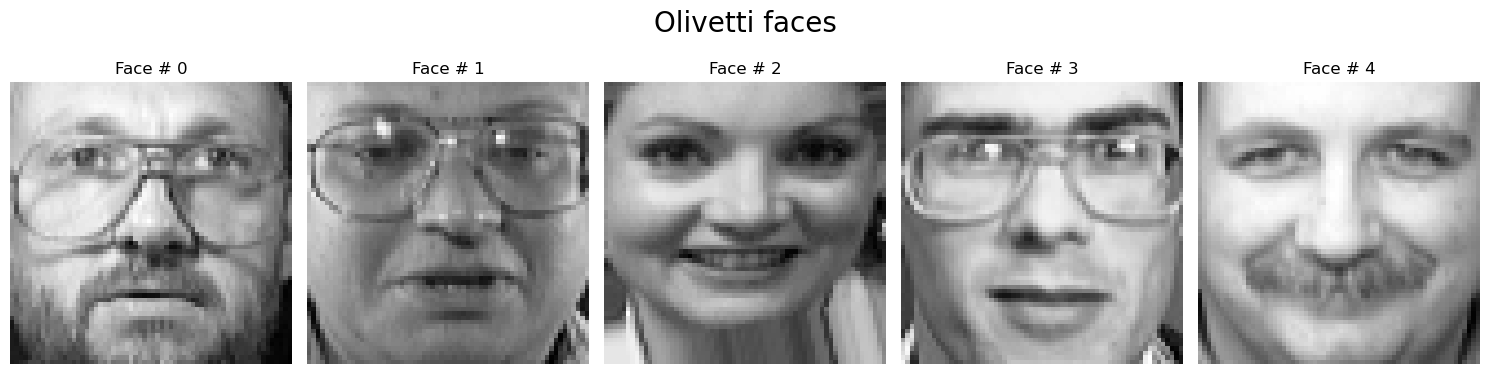

In [3]:
# Visualize Olivetti faces
figure, axis = plt.subplots(nrows=1, ncols=5, figsize=(15,4))  
for i, ax in enumerate(axis):
    ax.imshow(faces[i, :].reshape((64,64)), cmap='gray')
    ax.axis('off')
    ax.set_title("Face # "+str(i))
figure.suptitle('Olivetti faces', fontsize=20) 
figure.tight_layout()
plt.show()

### 2.1.1 Calculate and plot average face

In [4]:
# Calculate average face
average_face = faces.mean(axis = 0) # 'axis=0' since each row is a face
faces_centered = faces - average_face

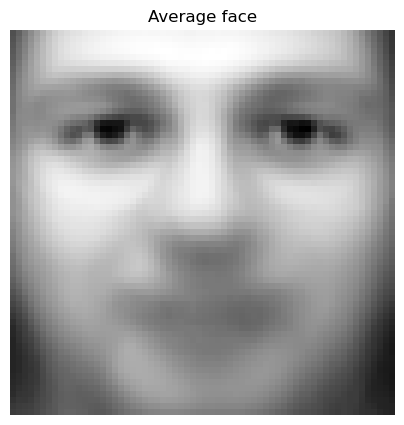

In [6]:
figure, axis = plt.subplots(figsize=(5,5))
axis.imshow(average_face.reshape((64,64)), cmap='gray')
axis.axis('off')
axis.set_title("Average face")
plt.show()

## 2.2 Create covariance matrix

In [7]:
# The covariance matrix can be calculated by a dot product between the centered data matrix by its transpose,
# after the dot product, we need to divide the resulting matrix by the number of variables of each data sample
def cov_matrix(matrix, n_rows, n_columns):
    
    if n_rows>n_columns:
        cov = np.dot(matrix.T, matrix)   
        cov = cov/(n_rows-1)
    else:
        cov = np.dot(matrix, matrix.T)
        cov = cov/(n_columns-1)
    return cov

In [8]:
cov = cov_matrix(faces_centered, n_samples, n_features)

## 2.3 Calculate eigenvectors and eigenvalues and sort them in descending order

In [9]:
from numpy.linalg import eig

# Calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = eig(cov)

In [10]:
# Sort eigenvalues (and eigenvectors) from largest to smallest 
idx = np.argsort(-eigenvalues)
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

## 2.4 Feature Vector

The number of principal components $k$ is determined arbitrarily by setting a threshold $ε$ on the total variance. The total variance is defined as $v = ( \lambda_{1} + \lambda_{1} + . . . + \lambda_{n} ) $, where $n$ is the number of components (eigenvectors). Then, $k$ is the smallest number that satisfies $\frac{( \lambda_{1} + \lambda_{1} + . . . + \lambda_{k} )}{v}>ε$. Let's say we want to get the eigenvectors that capture $95\%$ of the variance of all faces, in this case we will have $ε=0.95$.

In [11]:
total_variance = np.sum(eigenvalues)
eigen_sum = 0
eps = 0.95
for i in range(len(eigenvalues)):
    eigen_sum += eigenvalues[i]
    if eigen_sum/total_variance > eps:
        max_index = i
        break
print('The number of eigenvectors that capture the 95% of variance is:', max_index)

The number of eigenvectors that capture the 95% of variance is: 122


## 2.5 Recast the Data Along the Principal Components Axes

In [12]:
faces_recast = np.dot(faces_centered.T, eigenvectors)

## 2.6. Let's see the eigenfaces

Since 122 is a lot of faces to plot, we will only plot the first 20 eigenfaces.

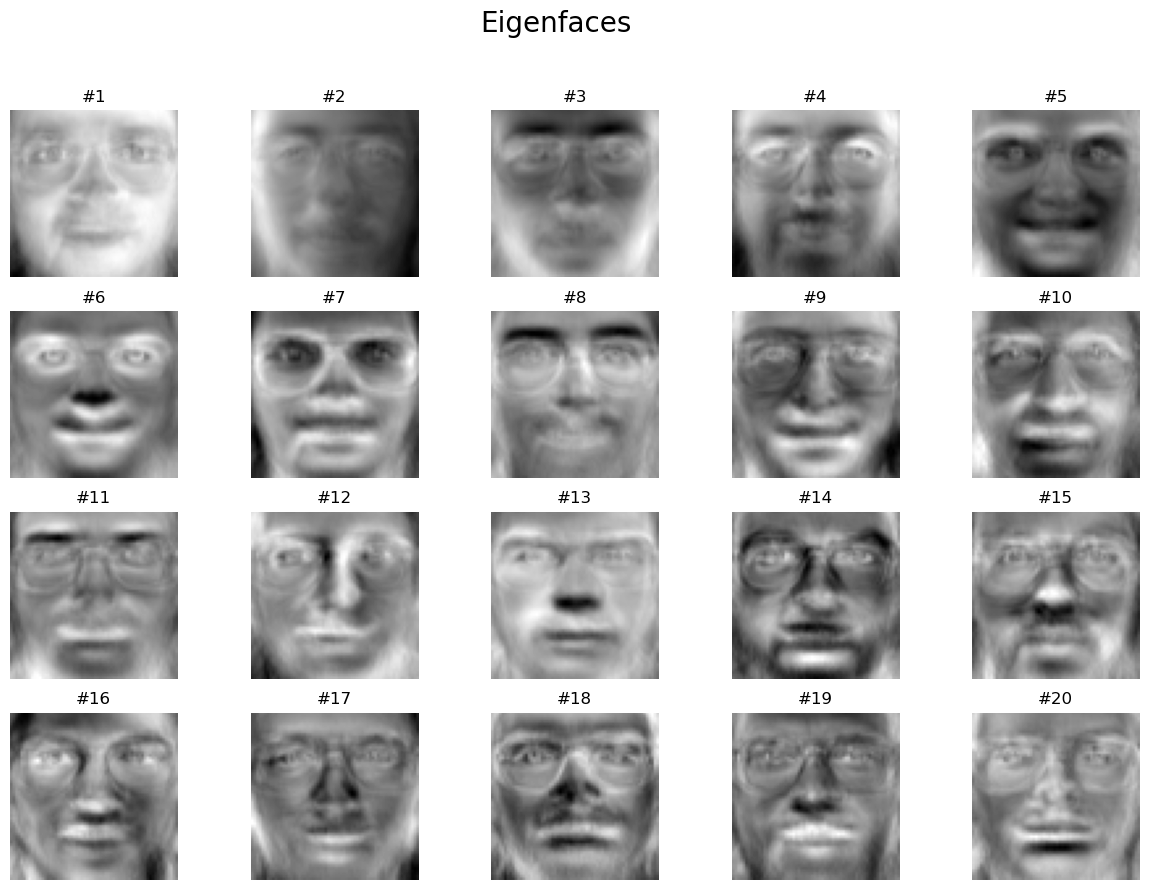

In [14]:
figure, axis = plt.subplots(nrows=4, ncols=5, figsize=(15,10))

eigenfaces_index = 0
for i in range(len(axis)):
    for j in range(len(axis[i])):        
        axis[i,j].imshow(faces_recast[:, eigenfaces_index].reshape((64,64)), cmap='gray')
        axis[i,j].axis('off')
        axis[i,j].set_title('#'+str(eigenfaces_index+1))
        eigenfaces_index += 1
figure.suptitle('Eigenfaces', fontsize=20)        
plt.show()

From the previous graph we can see that certain eigenfaces have more marked certain areas of the face than others, for example, eigenfaces #5, #6 and #7 have more defined eyes; eigenfaces #12 to #14 have more marked nose area. The first 3 faces are more blurred than the rest, this is because these 3 represent the greatest variance in the data, therefore they must be the most general of the group of 122 eigenfaces.

# 3. Which eigenfaces explain my face?

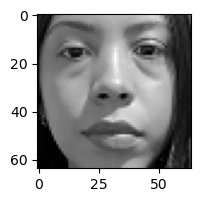

In [15]:
# Load a picture of myself
import cv2 as cv

mayra_pic = cv.imread('image.png')
mayra_pic = cv.cvtColor(np.float32(mayra_pic), cv.COLOR_BGR2GRAY) # Trick to load gray image with only 1 channel
figure, axis = plt.subplots(figsize=(2,2))
axis.imshow(mayra_pic, cmap='gray')
plt.show()

In [16]:
mayra_pic = mayra_pic.reshape(-1) # Turn matrix into vector

To find out which eigenfaces explain my face, we need to substract the average face to my image and then do the dot product between my face (now centered) with all the eigenfaces.

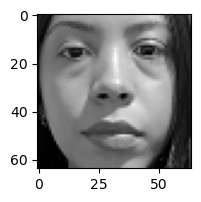

In [17]:
# Center my face
mayra_pic_centered = mayra_pic-average_face
figure, axis = plt.subplots(figsize=(2,2))
axis.imshow(mayra_pic_centered.reshape((64,64)), cmap='gray')
plt.show()

In [32]:
values = [np.dot(mayra_pic, i) for i in faces_recast.T[:122]]

Let's see if we can reconstruct my face with the values calculated. We will need to do the dot product between the variable *values* and the first 122 eigenfaces, to that result we add the average face.

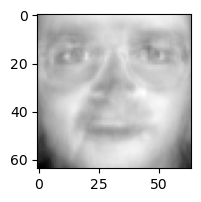

In [20]:
mayra_pic_reconstructed = 0
for i in range(122):
    mayra_pic_reconstructed += values[i]*faces_recast.T[i]
    
mayra_pic_reconstructed += average_face
figure, axis = plt.subplots(figsize=(2,2))
axis.imshow(mayra_pic_reconstructed.reshape((64,64)), cmap='gray')
plt.show()

Since my face is not in the dataset, it is impossible for these eigenfaces to reconstruct it. Let's look at the 5 eigenfaces that best explain my face.

In [24]:
faces_recast.T[0].shape

(4096,)

In [36]:
biggest_values = sorted(values)[-5:][::-1]

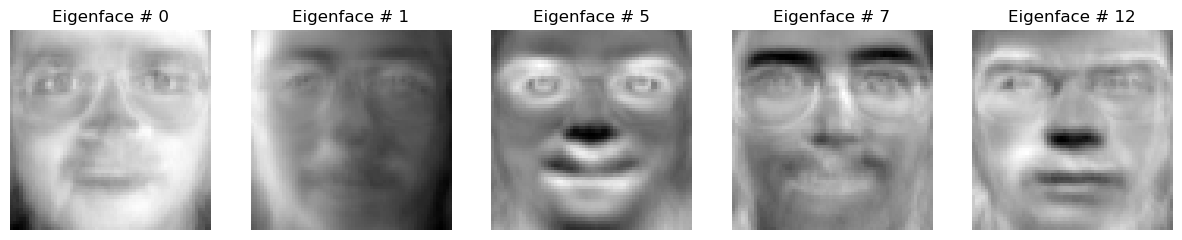

In [41]:
figure, axis = plt.subplots(nrows=1, ncols=5, figsize=(15,5))
for i, value in enumerate(biggest_values):
    eigenface_index = values.index(value)
    axis[i].imshow(faces_recast.T[eigenface_index].reshape((64,64)), cmap='gray')
    axis[i].axis('off')
    axis[i].set_title("Eigenface # "+ str(eigenface_index))
plt.show()

These are the eigenfaces that better explain my face.

# 4. Bibliography
<!-- BIBLIOGRAPHY START -->
<div class="csl-bib-body">
  <div class="csl-entry"><i id="zotero|14215332/QAQDTFI8"></i>Jaadi, Z. (n.d.). <i>A Step-by-Step Explanation of Principal Component Analysis (PCA)</i>. BuiltIn. <a href="https://builtin.com/data-science/step-step-explanation-principal-component-analysis">https://builtin.com/data-science/step-step-explanation-principal-component-analysis</a></div>
  <div class="csl-entry"><i id="zotero|14215332/WCBFAHE4"></i>Zhang, S., &#38; Turk, M. (n.d.). <i>Eigenfaces</i>. Scholarpedia. <a href="http://www.scholarpedia.org/article/Eigenfaces">http://www.scholarpedia.org/article/Eigenfaces</a></div>
</div>
<!-- BIBLIOGRAPHY END -->